# Plane's Windows

#### This exercices aims to build an algorithm to detect windows which are abnormal.

1/ With this information and no more, formulate the problem, and tell him what is feasible and what is not.

2/ Develop an approach to answer his question in the best way possible.

3/ Present your findings to the expert, in a way he can understand and help you validate your results...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
data = pd.read_csv("./data/dataset.csv")

df = data.drop(columns=["day_cycle_window"])

print(list(data["day_cycle_window"])[-1])

4_4_160


In [3]:
def plotAnomalyScore2D(df, clf_name, clf, n):
    """
        df: Pandas DataFrame containing all the points to plot (for features X1 and X2)
        clf_name: String value - name of the outlier detection model
        clf: Scikit Learn model instance - the trained outlier detection model
    """
    if clf_name == 'LOF':
        score = clf.negative_outlier_factor_
    else:
        score = clf.decision_function(df)
    
    for col in df.columns :
        fig = plt.figure()
        plot = plt.scatter(x=range(n), y=df[col], marker='.', c=-score, cmap='Reds')
        plt.colorbar(plot, label='anomaly score')
        plt.xlabel("Samples")
        plt.ylabel("Values")
        plt.title(clf_name + "\n" + col)

### Graphes des échantillons pour chacune des variables

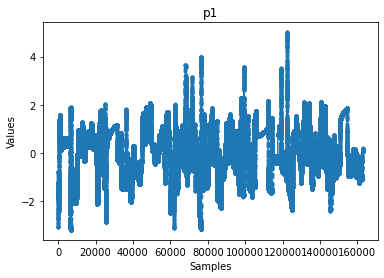

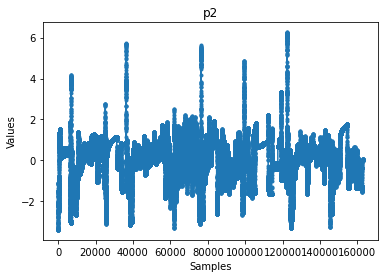

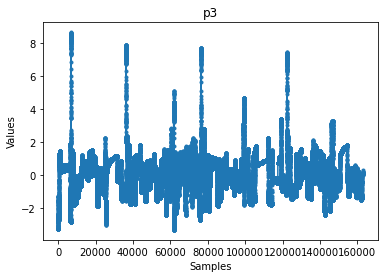

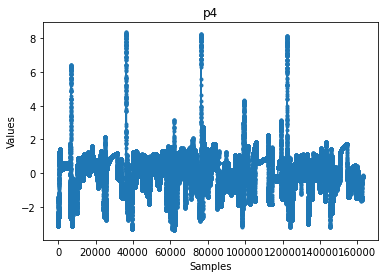

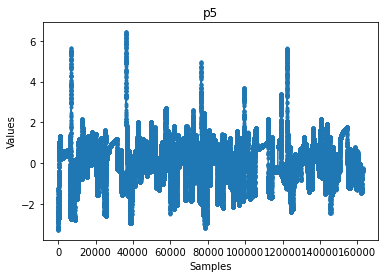

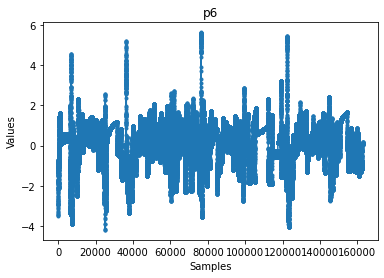

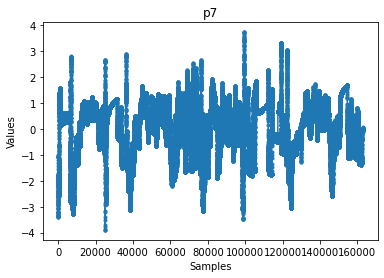

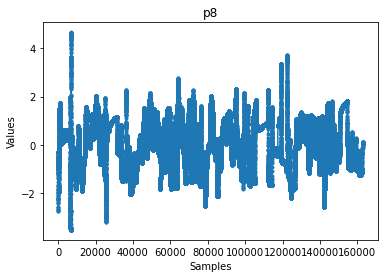

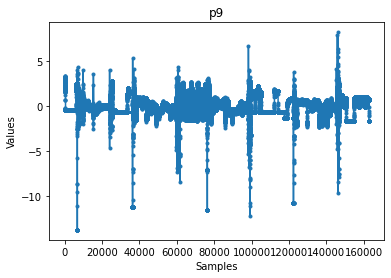

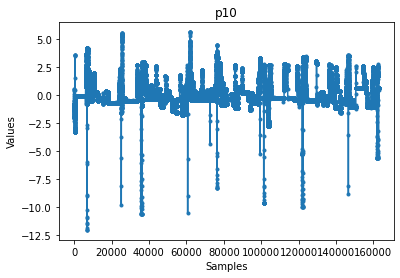

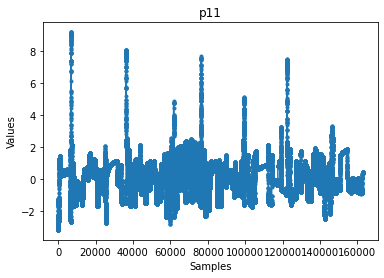

In [4]:
for col in df.columns :
    fig = plt.figure()
    plt.plot(df[col], marker='.')
    plt.xlabel("Samples")
    plt.ylabel("Values")
    plt.title(col)

# Etude de toutes les données d'un coup

# Méthodes Outliers

### Distance de Mahalanobis

In [5]:
clf_name = 'Elliptic Envelope'
clf = EllipticEnvelope(contamination=0.15)
clf.fit(df)

EllipticEnvelope(contamination=0.15)

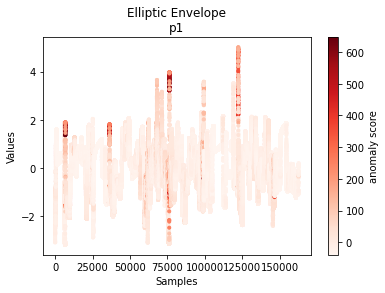

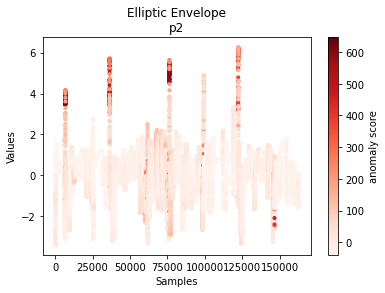

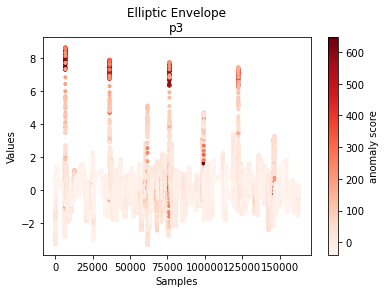

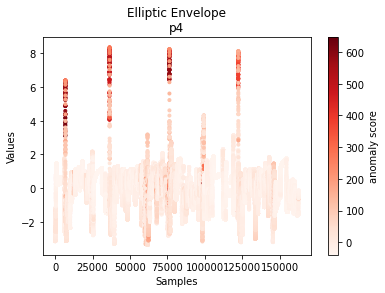

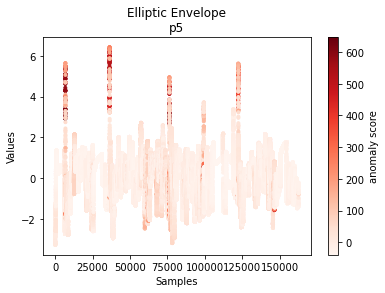

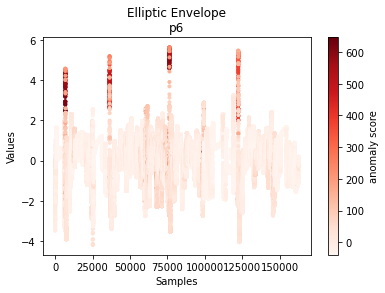

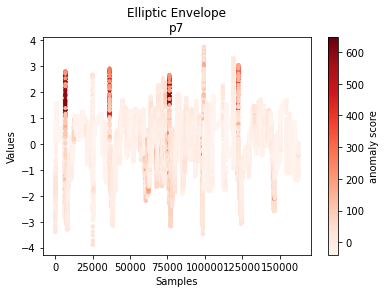

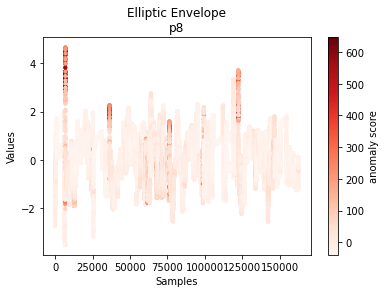

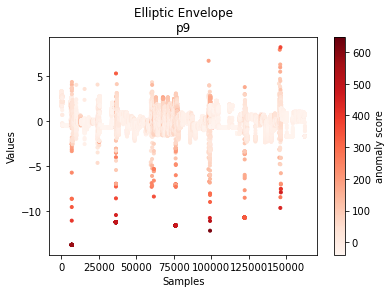

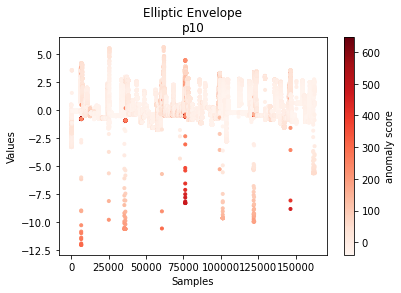

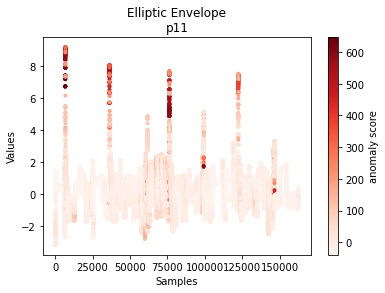

In [13]:
n = df.shape[0]

plotAnomalyScore2D(df, clf_name, clf, n)

### Méthode d'Isolation Forest

In [37]:
clf_name = 'Isolation Forest'
clf = IsolationForest(behaviour='new', n_estimators=100, contamination=0.05)
clf.fit(df)

/home/cdrutinus/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(


IsolationForest(behaviour='new', contamination=0.05)

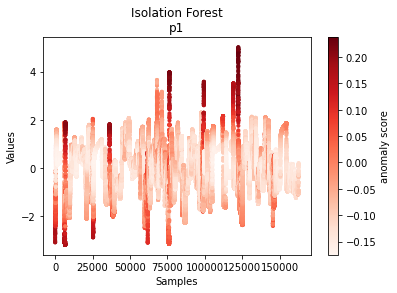

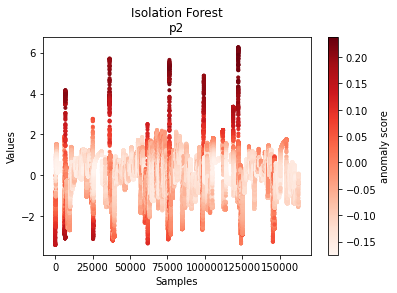

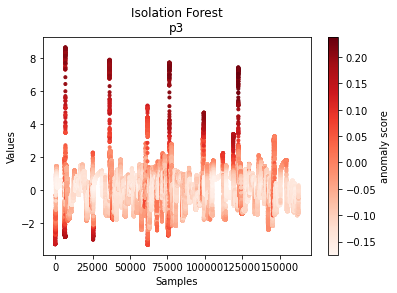

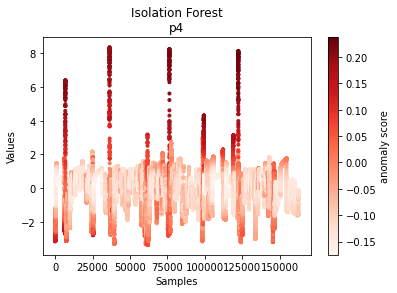

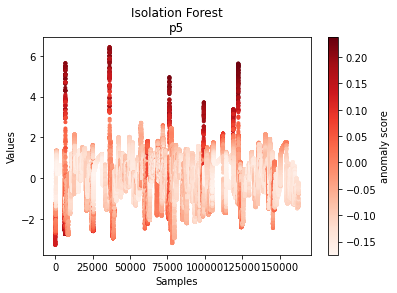

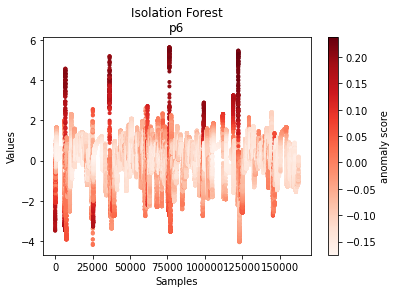

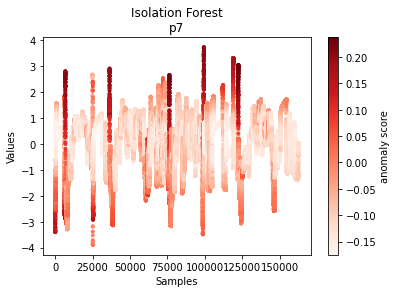

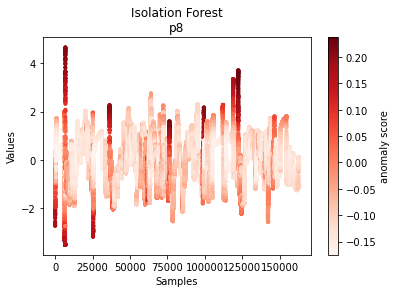

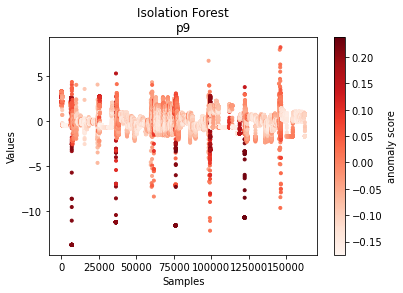

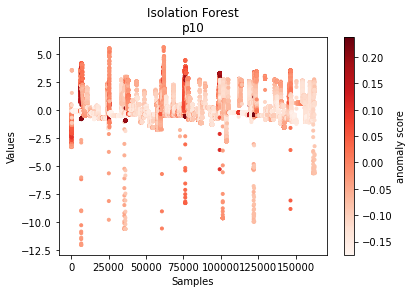

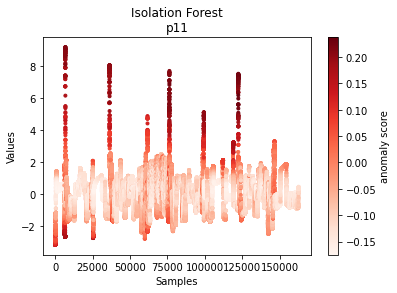

In [38]:
n = df.shape[0]

plotAnomalyScore2D(df, clf_name, clf, n)

# Etude des données jour par jour

In [18]:
def window(day, cycle, window):
    string = str(day) + '_' + str(cycle) + '_' + str(window)
    data_window = data[data["day_cycle_window"] == string]
    return data_window.drop(columns=["day_cycle_window"])

In [27]:
data_1_1_1 = window(1,1,1)

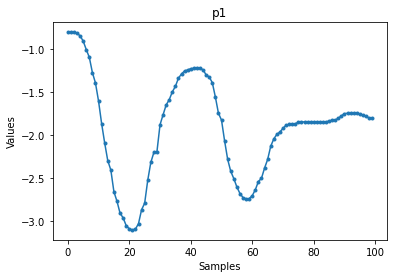

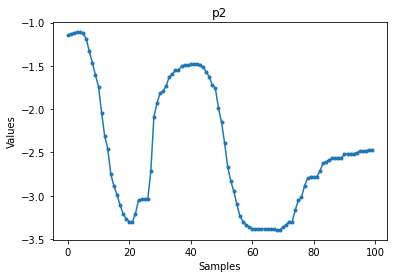

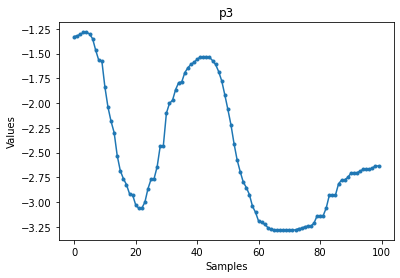

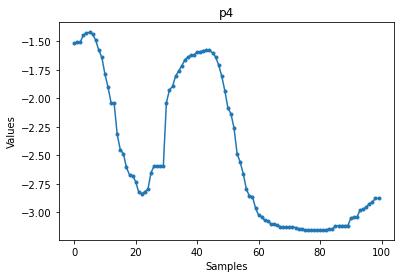

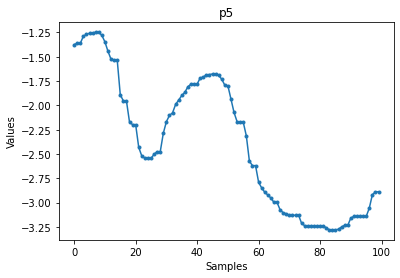

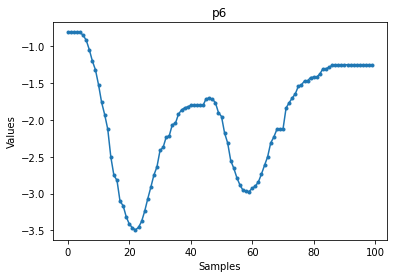

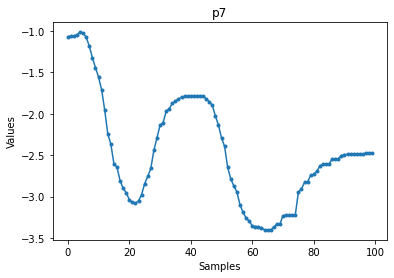

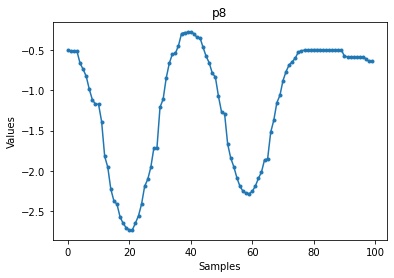

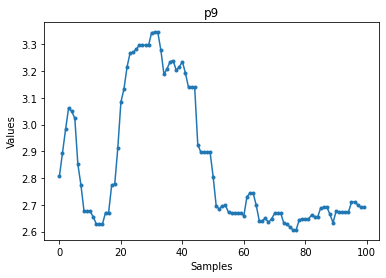

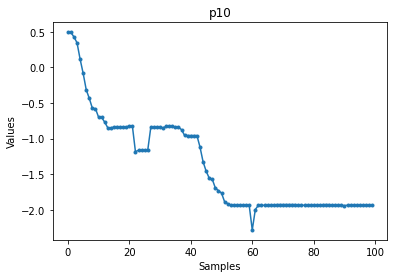

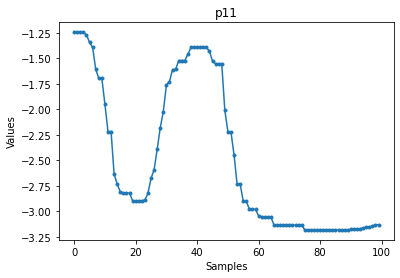

In [20]:
for col in data_1_1_1.columns :
    fig = plt.figure()
    plt.plot(data_1_1_1[col], marker='.')
    plt.xlabel("Samples")
    plt.ylabel("Values")
    plt.title(col)

In [22]:
clf_name = 'Elliptic Envelope'
clf = EllipticEnvelope(contamination=0.15)
clf.fit(data_1_1_1)

EllipticEnvelope(contamination=0.15)

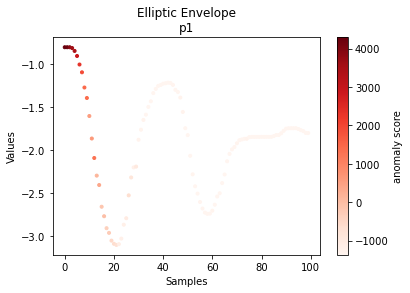

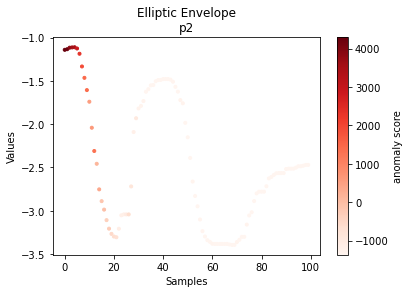

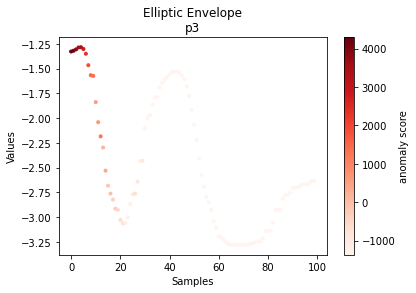

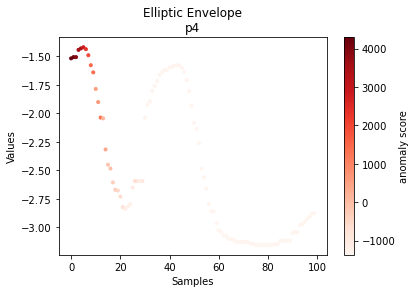

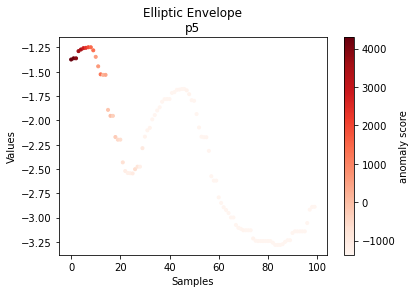

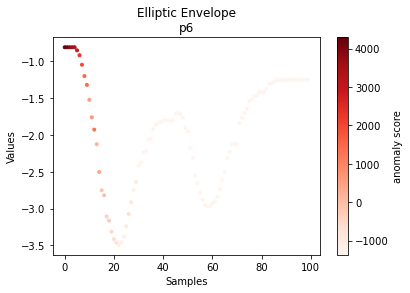

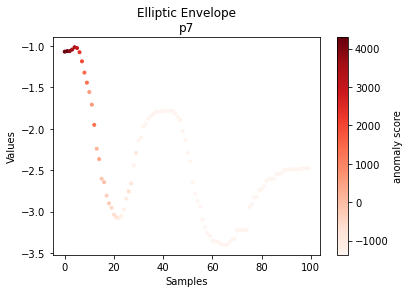

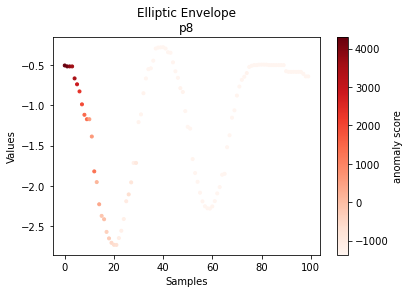

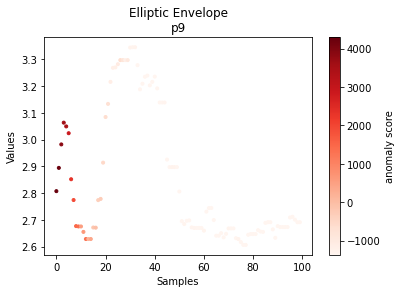

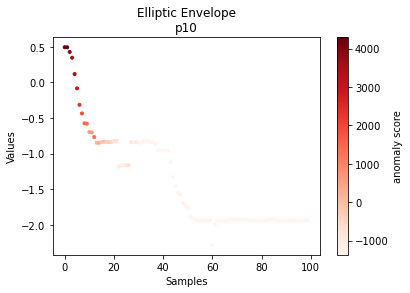

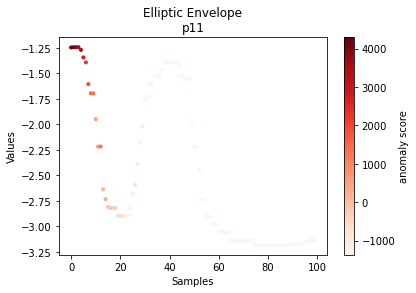

In [28]:
n = data_1_1_1.shape[0]

plotAnomalyScore2D(data_1_1_1, clf_name, clf, n)

In [31]:
clf_name = 'One Class SVM'
clf = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.3) # nu corresponds to contamination
clf.fit(data_1_1_1)

OneClassSVM(gamma=0.3, nu=0.05)

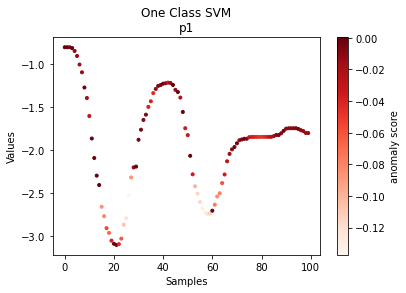

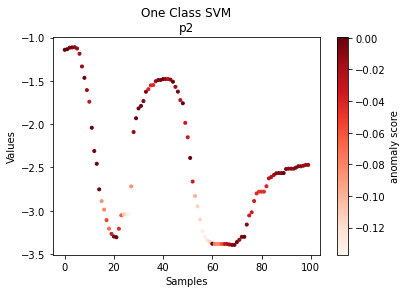

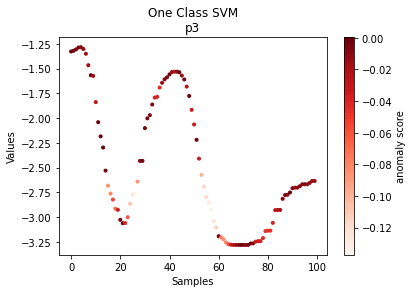

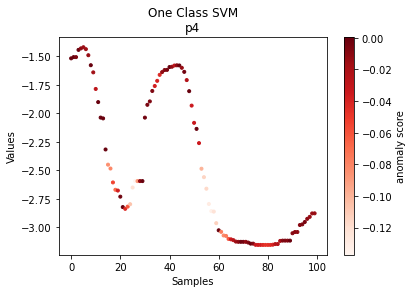

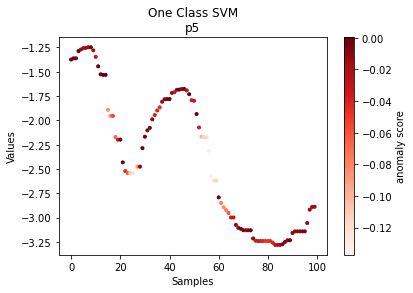

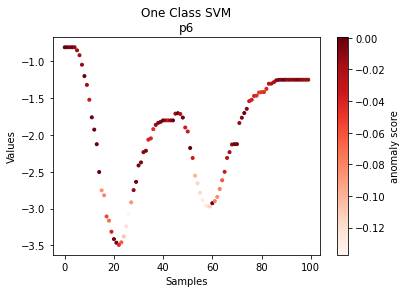

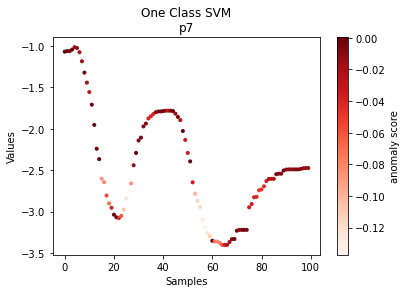

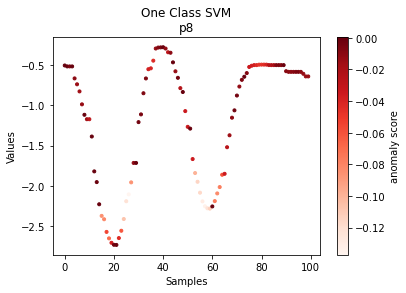

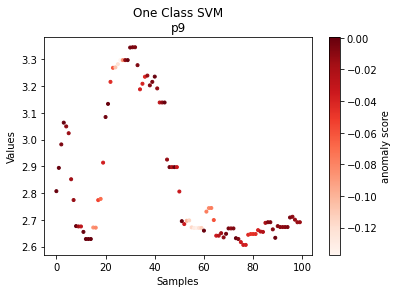

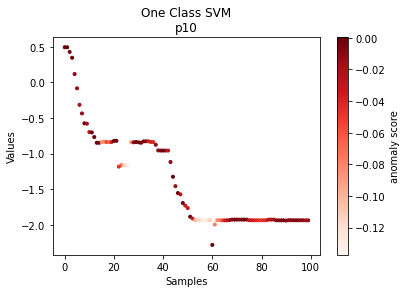

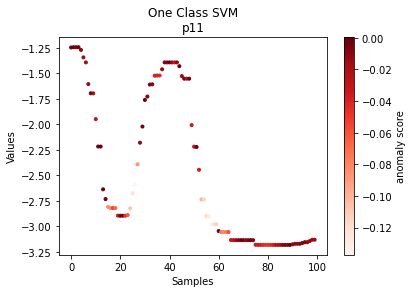

In [32]:
n = data_1_1_1.shape[0]

plotAnomalyScore2D(data_1_1_1, clf_name, clf, n)

# ACP

In [55]:
from sklearn.decomposition import PCA

(1637, 11)
[6.50905305 1.31676641 0.46973596 0.44933902 0.37844393 0.3337754
 0.2865976  0.21710219 0.19017173 0.1472805  0.04890299]


<BarContainer object of 11 artists>

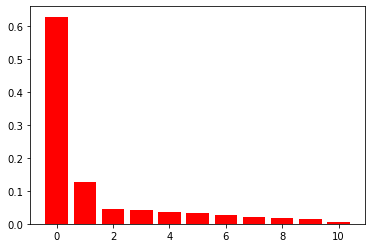

In [56]:
print(df.shape)

df_pca = PCA()
df_pca.fit(df)

print(df_pca.explained_variance_)

plt.bar(range(df.shape[1]), df_pca.explained_variance_ratio_, color="r", align="center")

In [57]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

print("{}%".format(round(np.sum(pca.explained_variance_ratio_)*100,2)))

75.63%


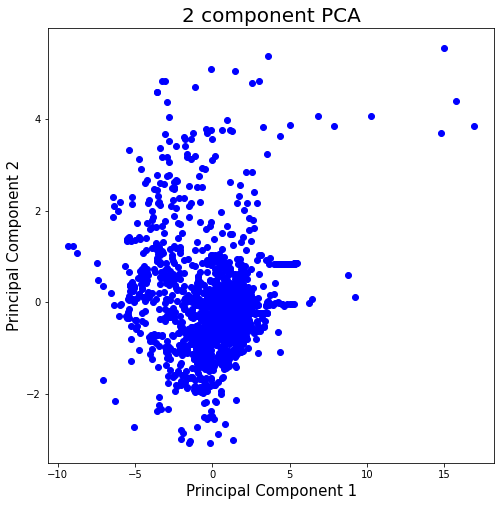

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(principalDf["principal component 1"], principalDf["principal component 2"], color='b')

In [75]:
def fit_predict(df, clf):
    clf.fit(df)
    ypred = clf.predict(df)
    return ypred

In [83]:
def plotAnomalies2D(df, ypred):
    """
        df: Pandas DataFrame containing all the points to plot (for features X1 and X2)
        clf_name: String value - name of the outlier detection model
        clf: Scikit Learn model instance - the trained outlier detection model
    """
    fig = plt.figure()
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    plt.scatter(df["principal component 1"], df["principal component 2"], color='b')
    plt.plot(df["principal component 1"][ypred==-1],df["principal component 2"][ypred==-1],'ro')
    

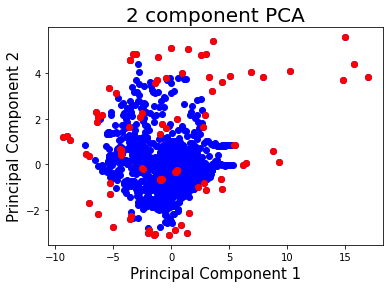

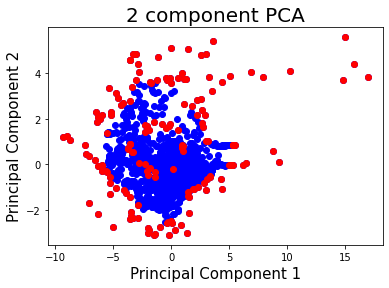

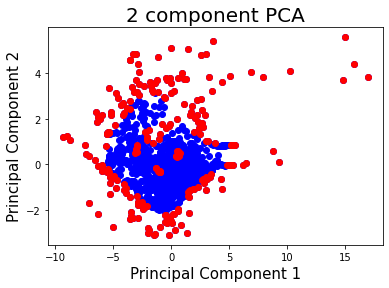

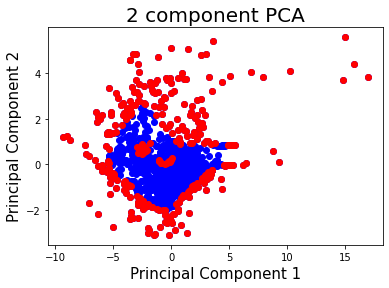

In [84]:
contaminations = np.arange(0.05,0.25,0.05)
for rate in contaminations:
    clf = OneClassSVM(nu=rate, kernel="rbf", gamma=0.3) # nu corresponds to contamination
    ypred = fit_predict(principalDf, clf)
    plotAnomalies2D(principalDf, ypred)

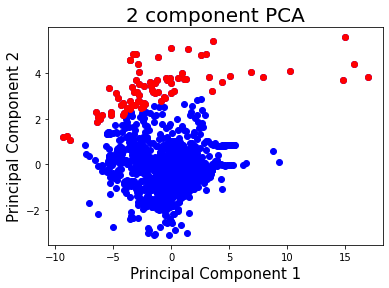

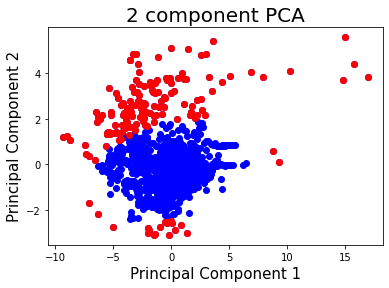

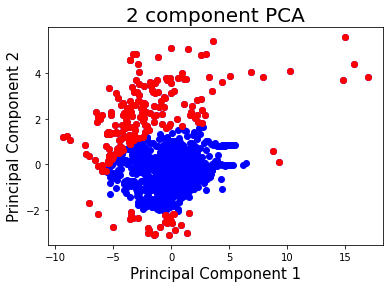

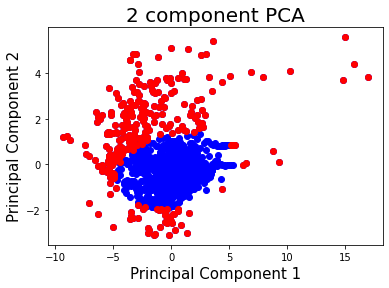

In [86]:
for rate in contaminations:
    clf = EllipticEnvelope(contamination=rate)
    ypred = fit_predict(principalDf, clf)
    plotAnomalies2D(principalDf, ypred)

/home/cdrutinus/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(
/home/cdrutinus/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(
/home/cdrutinus/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(
/home/cdrutinus/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(


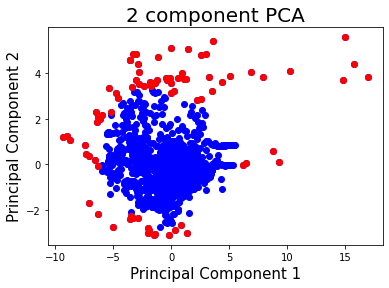

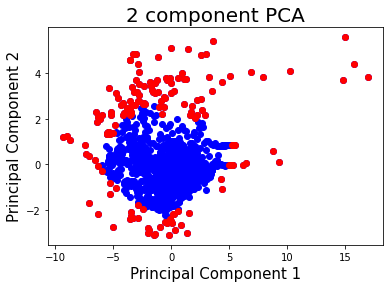

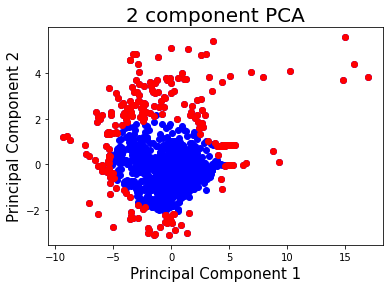

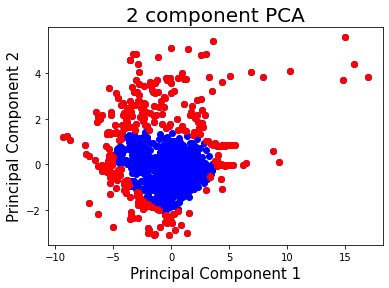

In [87]:
for rate in contaminations:
    clf = IsolationForest(behaviour='new', n_estimators=100, contamination=rate)
    ypred = fit_predict(principalDf, clf)
    plotAnomalies2D(principalDf, ypred)

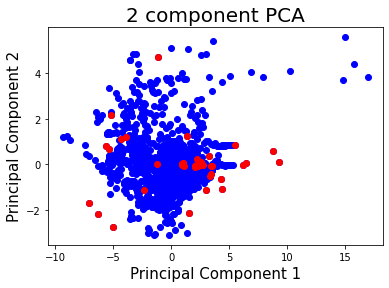

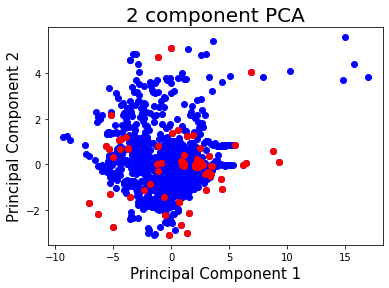

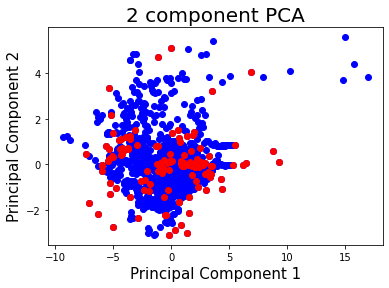

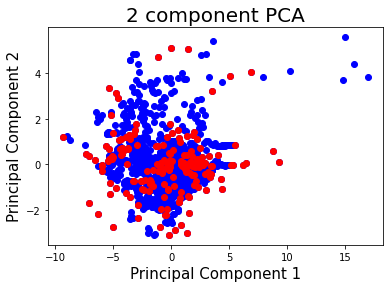

In [88]:
for rate in contaminations:
    clf = LocalOutlierFactor(n_neighbors=5, contamination=rate, novelty=True)
    ypred = fit_predict(principalDf, clf)
    plotAnomalies2D(principalDf, ypred)

# Tentative d'étude des moyennes et std

In [48]:
data = pd.read_csv("./data/dataset.csv")
df = data.groupby(['day_cycle_window']).mean()

print(df.shape[1])
means = [df['p{}'.format(i+1)].mean() for i in range(df.shape[1])]
print(means)

df

11
[0.0012382429317027957, 0.0022032655043842356, 0.004516185710092517, 0.0012267911135197338, 0.0020019445926268, -0.00017456174893335077, 0.0006256022842985659, 0.0006998953140561237, -0.00465706109632071, 0.004040357403079036, 0.005881312325289908]


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
day_cycle_window,,,,,,,,,,,
1_1_1,-1.926141,-2.456284,-2.487394,-2.481230,-2.388674,-1.984092,-2.447148,-1.169837,2.848242,-1.370045,-2.500060
1_1_10,1.204735,1.123558,1.077596,1.128253,1.136183,1.228688,1.199106,1.308412,-0.429810,-0.088168,1.016565
1_1_11,0.742475,0.703459,0.680578,0.740626,0.768269,0.736631,0.755362,0.783155,-0.429810,-0.091129,0.669938
1_1_12,0.300162,0.289058,0.289114,0.342999,0.396993,0.254292,0.324268,0.264819,-0.429810,-0.085217,0.303699
1_1_13,0.140935,0.152487,0.161874,0.200016,0.226986,0.083547,0.170042,0.068720,-0.429810,-0.089727,0.186059
...,...,...,...,...,...,...,...,...,...,...,...
4_4_95,-0.372836,0.141482,-0.149731,0.024193,0.623414,0.574988,-0.137674,-0.985834,0.935814,0.716441,-0.683516
4_4_96,-0.422993,0.074675,-0.178621,-0.197507,0.619532,0.805870,0.327148,-1.005362,0.924742,0.226022,-0.722753
4_4_97,-0.453629,0.040768,-0.130621,-0.370856,0.415872,0.808718,0.620583,-0.986663,0.905289,0.171044,-0.741979
